# Exercises of the tenth week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

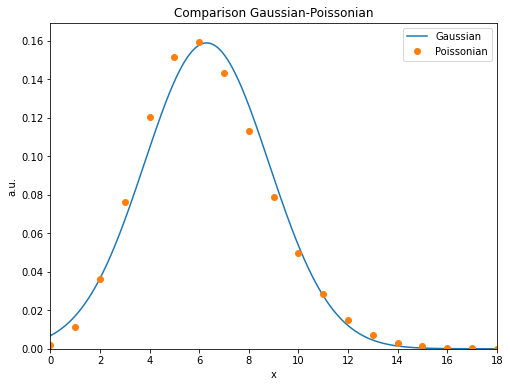

The poisson distribution having mean = 6.3 is approximately gaussian distributed, therefore we can run a Z-test.
The Z score is equal to 3.466, which is larger than 3, therefore the number of hurricanes is significantly different.


In [6]:
def poi(k):
    prob = 0
    avg = 6.3
    for i in range(k):
        probk = ((avg**i)*(np.exp(-avg)))/(np.math.factorial(i))
        prob += probk
    return prob

def zeta(val, mean, sigma):
    Z = abs(val - mean) / sigma
    return Z

xgauss = np.linspace(6.3 - 5*np.sqrt(6.3) , 6.3 + 5*np.sqrt(6.3), 1000)
gauss = sp.stats.norm.pdf(xgauss, loc=6.3, scale=np.sqrt(6.3))
xpoisson = np.linspace(0,18,19)
poisson = sp.stats.poisson.pmf(xpoisson, mu=6.3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(xgauss, gauss) 
ax.plot(xpoisson, poisson, marker="o", linestyle="None")
ax.set_title("Comparison Gaussian-Poissonian")
ax.set_xlabel("x")
ax.set_ylabel("a.u.")
ax.legend(["Gaussian", "Poissonian"])
ax.set_xlim(np.min(xpoisson), np.max(xpoisson))
ax.set_ylim(0, np.max(poisson)+0.01)
plt.show()

prob15more = 1-poi(15)

print("The poisson distribution having mean = 6.3 is approximately gaussian distributed, therefore we can run a Z-test.")
Z = zeta(15, 6.3, np.sqrt(6.3))

print("The Z score is equal to " + str(np.around(Z, 3)) + ", which is larger than 3, therefore the number of hurricanes is significantly different.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Student's T = -3.786997938137629
The test statistics is two-sided, therefore the p-value is two-sided as well.


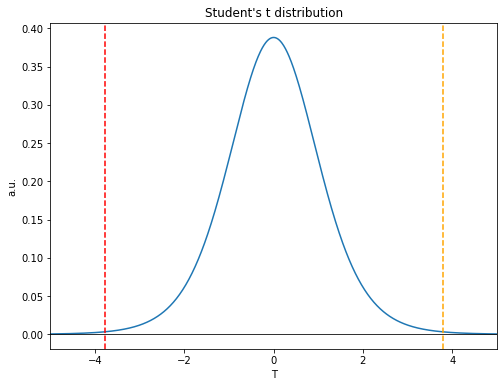

p-value = 0.004302464132864604
The p-value is smaller than the significance level (0.05), therefore we reject the null hypothesis, meaning the change in blood pressure in the sample is significant.


In [24]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
premean = np.mean(pre)
postmean = np.mean(post)
presigma = np.sqrt(np.var(pre, ddof=1))
postsigma = np.sqrt(np.var(post, ddof=1))
tsigma = np.sqrt(((presigma**2)+(postsigma**2))/2)
tstud = (premean-postmean)/(tsigma*np.sqrt(2/n))

print("Student's T = " + str(tstud))
print("The test statistics is two-sided, therefore the p-value is two-sided as well.")

xst = np.linspace(-5, +5, 1000)
tst = sp.stats.t.pdf(xst, n-1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(xst, tst)
ax.axvline(tstud, linestyle="--", color="r")
ax.axvline(-tstud, linestyle="--", color="orange")
ax.axhline(0, linewidth=0.8, color="k")
ax.set_title("Student's t distribution")
ax.set_xlabel("T")
ax.set_ylabel("a.u.")
ax.set_xlim(np.min(xst), np.max(xst))
plt.show()

pv = sp.stats.t.cdf(tstud, n-1) + (1. - sp.stats.t.cdf(-tstud, n-1))
print("p-value =", pv)
print("The p-value is smaller than the significance level (0.05), therefore we reject the null hypothesis, meaning the change in blood pressure in the sample is significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Tmax fit function parameters:
 [ 27.94963534 -10.58169954   0.59227424  -0.84013367]
Tmax covariance matrix:
 [[ 0.1833971  -0.00655279  0.00640272 -0.04203833]
 [-0.00655279  0.1681644   0.00085885 -0.00522752]
 [ 0.00640272  0.00085885  0.00044872 -0.00296267]
 [-0.04203833 -0.00522752 -0.00296267  0.02135828]]
a = 27.95 +- 0.43
b = -10.58 +- 0.41
c = 0.59 +- 0.02
d = -0.84 +- 0.15

Tmin fit function parameters:
 [-36.71255965 -25.14961943   0.6013211   -1.14762731]
Tmin covariance matrix:
 [[ 1.41858429e+00 -1.89201973e-01  1.59999606e-02 -1.04186062e-01]
 [-1.89201973e-01  1.72807185e+00  2.47923552e-04  3.66628264e-03]
 [ 1.59999606e-02  2.47923552e-04  5.30710620e-04 -3.55959334e-03]
 [-1.04186062e-01  3.66628264e-03 -3.55959334e-03  2.70516826e-02]]
a = -36.71 +- 1.19
b = -25.15 +- 1.31
c = 0.60 +- 0.02
d = -1.15 +- 0.16


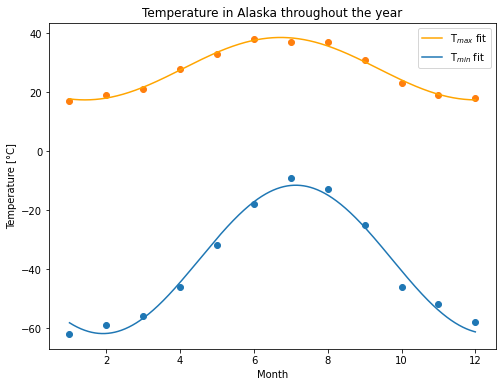

In [61]:
def sinusoidal(x, a, b, c, d):
    return a+b*np.cos(c*x+d)

month = np.arange(1,13)
Tmax = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
Tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
ax.plot(month, Tmin, month, Tmax, marker="o", linestyle="None")

popth, pcovh = sp.optimize.curve_fit(sinusoidal, month, Tmax, p0=[30, -10, 0.5, -1], full_output=False)
print("Tmax fit function parameters:\n", popth)
print("Tmax covariance matrix:\n", pcovh)
print("a = %.2f +- %.2f" % (popth[0], np.sqrt(pcovh[0,0])))
print("b = %.2f +- %.2f" % (popth[1], np.sqrt(pcovh[1,1])))
print("c = %.2f +- %.2f" % (popth[2], np.sqrt(pcovh[2,2])))
print("d = %.2f +- %.2f" % (popth[3], np.sqrt(pcovh[3,3])))

poptc, pcovc = sp.optimize.curve_fit(sinusoidal, month, Tmin, p0=[-35, -25, 0.5, -1], full_output=False)
print("\nTmin fit function parameters:\n", poptc)
print("Tmin covariance matrix:\n", pcovc)
print("a = %.2f +- %.2f" % (poptc[0], np.sqrt(pcovc[0,0])))
print("b = %.2f +- %.2f" % (poptc[1], np.sqrt(pcovc[1,1])))
print("c = %.2f +- %.2f" % (poptc[2], np.sqrt(pcovc[2,2])))
print("d = %.2f +- %.2f" % (poptc[3], np.sqrt(pcovc[3,3])))

xf = np.linspace(1, 12, 1101)
ax.plot(xf, sinusoidal(xf, popth[0], popth[1], popth[2], popth[3]), color="orange", label="T$_{max}$ fit")
ax.plot(xf, sinusoidal(xf, poptc[0], poptc[1], poptc[2], poptc[3]), color="tab:blue", label="T$_{min}$ fit")
ax.set_title("Temperature in Alaska throughout the year")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [°C]")
ax.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

<ErrorbarContainer object of 3 artists>

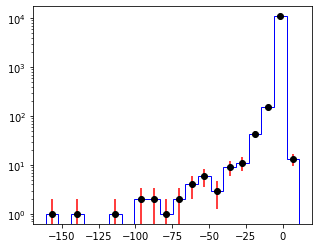

In [80]:
import pickle

filename = "../07ex/data7/residuals_261.pkl"
infile = open(filename, "rb")
tdict = pickle.load(infile).item()
infile.close()
df = pd.DataFrame(tdict)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
entries, edges, _ = ax.hist(df["residuals"], bins=20, histtype="step", color="b")
plt.yscale("log")

binctr = np.array((edges[1:]+edges[:-1])/2)
ax.errorbar(binctr, entries, yerr=np.sqrt(entries), fmt="ko", ecolor="r")

def exponential(x, a, b, c, d):
    return a+b*np.exp(c*x+d)
    
xf = np.linspace(edges[0], edges[-1], 1000)
popt, pcov = sp.optimize.curve_fit(sinusoidal, month, Tmax, p0=[30, -10, 0.5, -1], full_output=False)
ax.plot(xf, exponential(xf, popth[0], popth[1], popth[2], popth[3]), color="orange", label="T$_{max}$ fit")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.